# Ballistics with Air Resistance

The gravitational force is constant if the altitude doesn't change too much.  The force of air resistance is proportional to the square of the velocity, apparently.

$$ F_g = -m g \hat y $$

$$ F_f = -b |v|^2 \hat v $$

Add all the forces!  The total force is the gravitational force plus the friction force.

$$ F_t = F_g + F_f = m \frac {d \vec v}{dt} = -m g \hat y + -b |\vec v|^2 \hat v $$

Decompose vectors into orthogonal components

$$ 
m ( \frac {dv_x}{dt} \hat x + \frac {dv_y}{dt} \hat y ) 
= -m g \hat y  -b \sqrt{ v_x^2 + v_y^2 } \cdot ( v_x \hat x + v_y \hat y )
$$

Separate the x and y components into equations

$$ \frac {dv_x}{dt} = -\frac{ b v_x } {m} \sqrt{ v_x^2 + v_y^2 } $$
$$ \frac {dv_y}{dt} = \frac{-b v_y}{m} \sqrt{ v_x^2 + v_y^2 } -g  $$


This is a "system" of ordinary differential equations - equations whose solutions are equations.  Brilliant.

Apparently scipy can do this kind of thing



An 80kg person jumps out of an airplane moving at 50m/s horizontally.  Terminal velocity is -55m/s.  Find the velocity and how long it takes to get within 1% of terminal velocity.


The parameter b, which is a proportionality constant of the air resistance, can be found using the terminal velocity.  At terminal velocity the force from the air cancels out the gravitational force
so there's no net acceleration.

$$ -mg \hat y + -bv_t^2 (-\hat y) = 0 $$ 

The velocity vector points downwards so $ \hat v_t=- \hat y$

$$ -mg + b v_t^2 = 0 $$ 

$$ b = \frac{mg}{v_t^2} $$


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# return the acceleration ( dvx/dt, dvy/dt ) given the necessary parameters (see the equations above).
def dvdt( v,t,m,g,vt ):
    vx=v[0]
    vy=v[1]
    b = m*g/abs(vt)**2 # At terminal velocity m g = b |vt|**2 so b = m*g/|vt|**2
    return [ 
        -b*vx/m * np.sqrt(vx**2+vy**2), #dvx/dt
        -b*vy/m * np.sqrt(vx**2+vy**2) -g  #dvy/dt
    ] 


t= np.linspace(0,20,100)
m=80
g=9.81
vt=-55
b=m*g/vt**2
v0x,v0y = 50, 0

solution = odeint(func=dvdt, y0=[v0x,v0y], t=t, args=(m,g,vt))


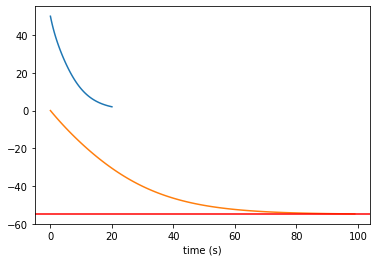

In [17]:

solution = solution.transpose()

plt.xlabel("time (s)")
plt.plot(t,solution[0], solution[1])
plt.axhline(y=-55, color='r', linestyle='-')
